**Wykres kołowy**

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
%matplotlib inline

In [2]:
bar = pd.read_csv('C:/Users/Mariusz Baran/Data_Science_kurs/Data_science_pliki/course-files/weather_barcelona.csv',
                 index_col='Date')
rom = pd.read_csv('C:/Users/Mariusz Baran/Data_Science_kurs/Data_science_pliki/course-files/weather_rome.csv',
                 index_col='Date')
ams = pd.read_csv('C:/Users/Mariusz Baran/Data_Science_kurs/Data_science_pliki/course-files/weather_amsterdam.csv',
                 index_col='Date')

In [3]:
temp_max = pd.DataFrame(index=bar.index)
temp_max['Barcelona'] = bar['TempMax']
temp_max['Rome'] = rom['TempMax']
temp_max['Amsterdam'] = ams['TempMax']

Funkcja dzieląca dni powyżej średniej i poniżej średniej

In [5]:
def grade_day(row):
    if (row['TempMax'] >= row['AvgTempMax']):
        return 'PLUS'
    else:
        return 'MINUS'

In [6]:
rom['GradeDay'] = rom.apply(grade_day, axis=1)
bar['GradeDay'] = bar.apply(grade_day, axis=1)
ams['GradeDay'] = ams.apply(grade_day, axis=1)

In [7]:
rom.head()

,TempMax,TempMin,Rain,AvgTempMax,AvgTempMin,GradeDay
Date,,,,,,
2018-01-01,14,8,0,12,4,PLUS
2018-01-02,13,7,0,12,4,PLUS
2018-01-03,14,1,0,12,4,PLUS
2018-01-04,16,6,0,12,4,PLUS
2018-01-05,17,7,0,12,3,PLUS


In [8]:
rom['GradeDay'].value_counts()

PLUS     70
MINUS    20
Name: GradeDay, dtype: int64

Tworzenie nowego DF z wyznaczonymi warotściami

In [14]:
cities3 = pd.DataFrame(index=['MINUS', 'PLUS'])
cities3['Barcelona'] = bar['GradeDay'].value_counts()
cities3['Rome'] = rom['GradeDay'].value_counts()
cities3['Amsterdam'] = ams['GradeDay'].value_counts()
cities3

,Barcelona,Rome,Amsterdam
MINUS,26,20,22
PLUS,64,70,68


Rysowanie wykresu kołowego: argument kind='pie'

<AxesSubplot:ylabel='Barcelona'>

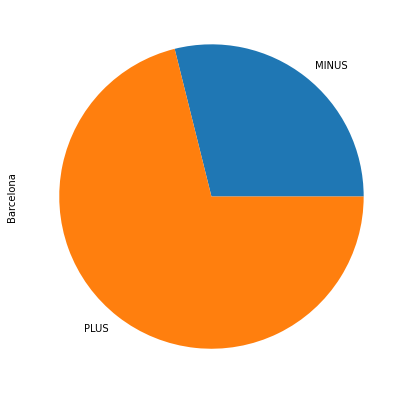

In [15]:
cities3['Barcelona'].plot(kind='pie', figsize=(7, 7))

array([<AxesSubplot:ylabel='Barcelona'>, <AxesSubplot:ylabel='Rome'>,
       <AxesSubplot:ylabel='Amsterdam'>], dtype=object)

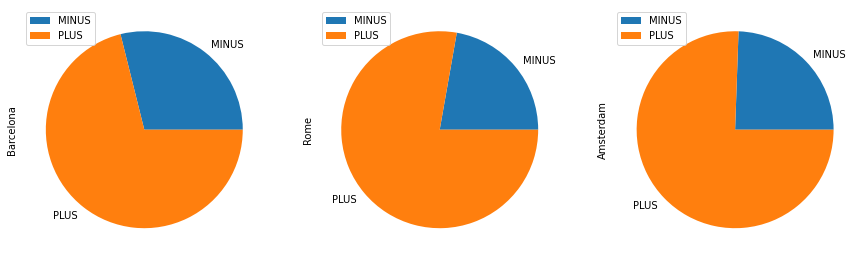

In [20]:
cities3.plot(kind='pie', subplots=True, figsize=(15, 5))

array([<AxesSubplot:ylabel='Barcelona'>, <AxesSubplot:ylabel='Rome'>,
       <AxesSubplot:ylabel='Amsterdam'>], dtype=object)

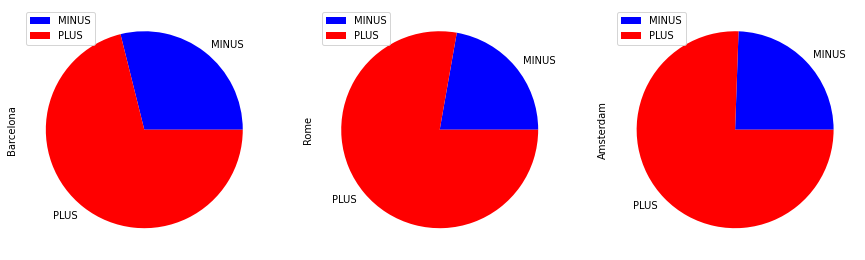

In [24]:
cities3.plot(kind='pie', subplots=True, figsize=(15, 5), colors=['b', 'r'])

labels - napisy przy części wykresu

array([<AxesSubplot:ylabel='Barcelona'>, <AxesSubplot:ylabel='Rome'>,
       <AxesSubplot:ylabel='Amsterdam'>], dtype=object)

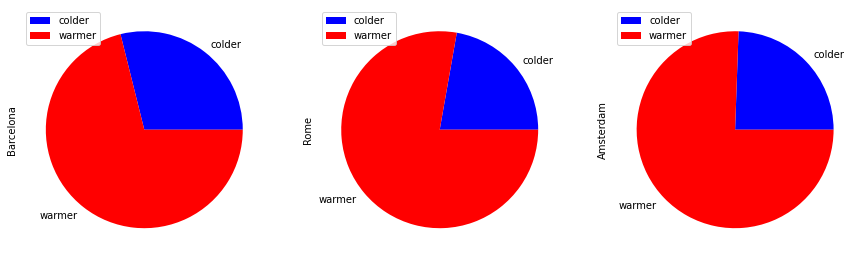

In [26]:
cities3.plot(kind='pie', subplots=True, figsize=(15, 5), colors=['b', 'r'], labels=['colder', 'warmer'])

autopct - procenty na wykresie, fontsize - wielkość czcionki, textprops=dict(color='w') - zmiana koloru czcionki na biały

array([<AxesSubplot:ylabel='Barcelona'>, <AxesSubplot:ylabel='Rome'>,
       <AxesSubplot:ylabel='Amsterdam'>], dtype=object)

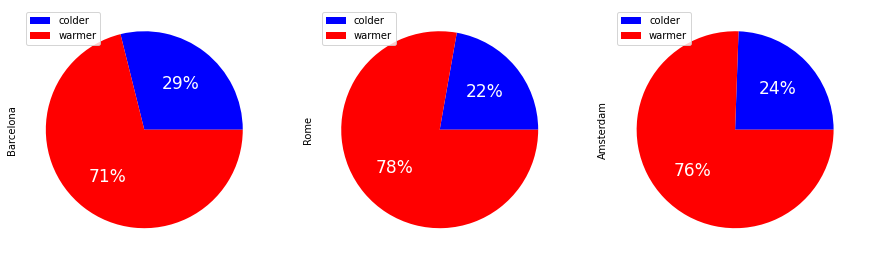

In [28]:
cities3.plot(kind='pie', subplots=True, figsize=(15, 5), colors=['b', 'r'], labels=['colder', 'warmer'],
            autopct='%.0f%%', fontsize=17, textprops=dict(color='w'))

layout - rozmieszczenie wykresów

array([[<AxesSubplot:ylabel='Barcelona'>, <AxesSubplot:ylabel='Rome'>],
       [<AxesSubplot:ylabel='Amsterdam'>, <AxesSubplot:>]], dtype=object)

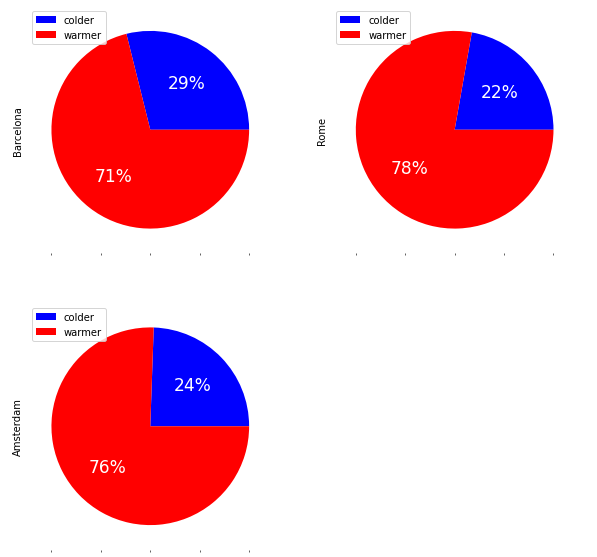

In [31]:
cities3.plot(kind='pie', subplots=True, figsize=(10, 10), colors=['b', 'r'], labels=['colder', 'warmer'],
            autopct='%.0f%%', fontsize=17, textprops=dict(color='w'), layout=(2, 2))

explode - wysunięcie części wykresu

array([<AxesSubplot:ylabel='Barcelona'>, <AxesSubplot:ylabel='Rome'>,
       <AxesSubplot:ylabel='Amsterdam'>], dtype=object)

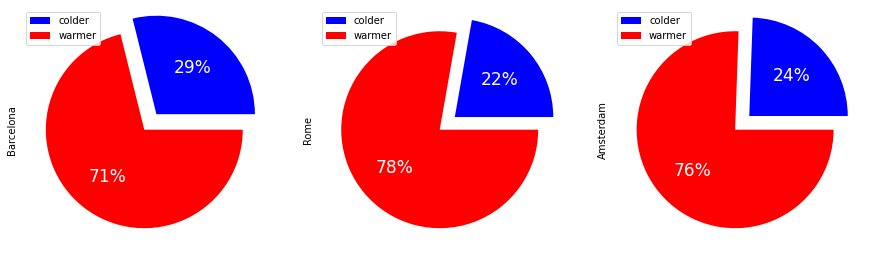

In [33]:
cities3.plot(kind='pie', subplots=True, figsize=(15, 5), colors=['b', 'r'], labels=['colder', 'warmer'],
            autopct='%.0f%%', fontsize=17, textprops=dict(color='w'), explode=(0.2, 0))